In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.dslabs_functions import plot_bar_chart, get_variable_types, define_grid, HEIGHT, plot_multibar_chart, NR_STDEV, IQR_FACTOR, determine_outlier_thresholds_for_var,count_outliers, set_chart_labels, plot_multiline_chart,  plot_multi_scatters_chart
import seaborn as sns
import numpy as np

### Services domain - Credit score

In [17]:
df = pd.read_csv('../datasets/class_credit_score.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,Credit_History_Age,Payment_of_Min_Amount,TotalEMIpermonth,Amountinvestedmonthly,Payment_Behaviour,MonthlyBalance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Dimensionality

In [18]:
df.shape

(100000, 28)

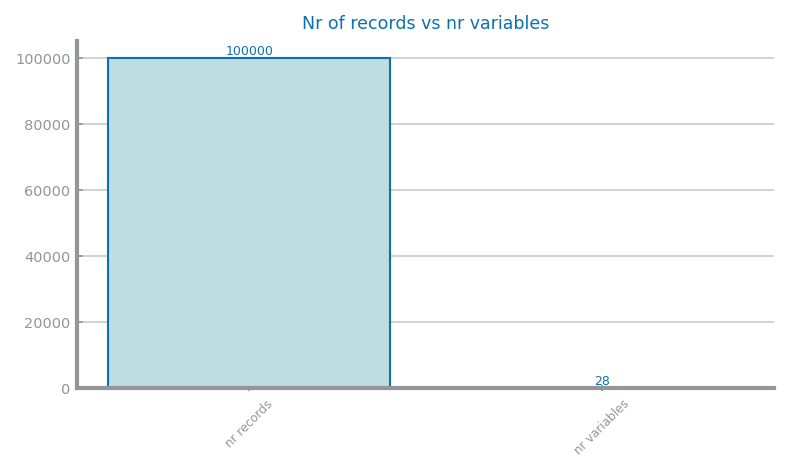

In [19]:
#Figure 1 Nr Records x Nr variables 
plt.figure(figsize=(6, 3))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
plt.show()

{'numeric': ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'NumofLoan', 'Delay_from_due_date', 'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio', 'TotalEMIpermonth', 'Amountinvestedmonthly', 'MonthlyBalance'], 'binary': ['Credit_Score'], 'date': [], 'symbolic': ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Type_of_Loan', 'CreditMix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']}


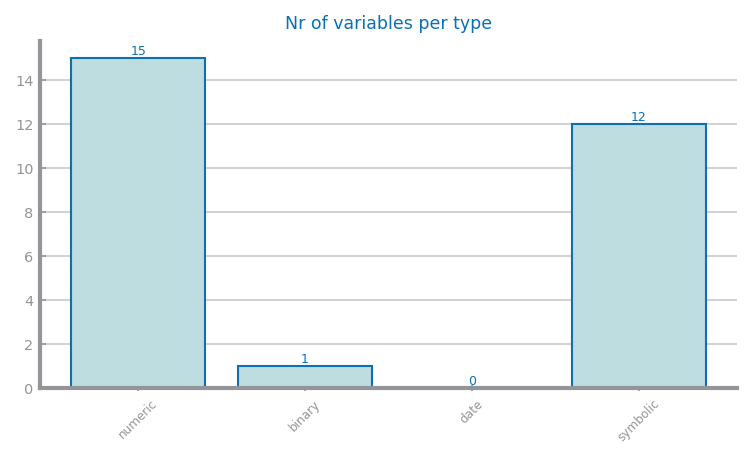

In [20]:
#Figure 2 Nr variables per type 
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

plt.figure(figsize=(6, 3))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
plt.show()

If we need to apply any function that only deals with symbolic variables, we need to transform object variables into category ones (the name for symbolic in pandas).

In [21]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

ID                        category
Customer_ID               category
Month                     category
Name                      category
Age                       category
SSN                       category
Occupation                category
Annual_Income              float64
Monthly_Inhand_Salary      float64
Num_Bank_Accounts            int64
Num_Credit_Card              int64
Interest_Rate                int64
NumofLoan                    int64
Type_of_Loan              category
Delay_from_due_date          int64
NumofDelayedPayment        float64
ChangedCreditLimit         float64
NumCreditInquiries         float64
CreditMix                 category
OutstandingDebt            float64
CreditUtilizationRatio     float64
Credit_History_Age        category
Payment_of_Min_Amount     category
TotalEMIpermonth           float64
Amountinvestedmonthly      float64
Payment_Behaviour         category
MonthlyBalance             float64
Credit_Score                object
dtype: object

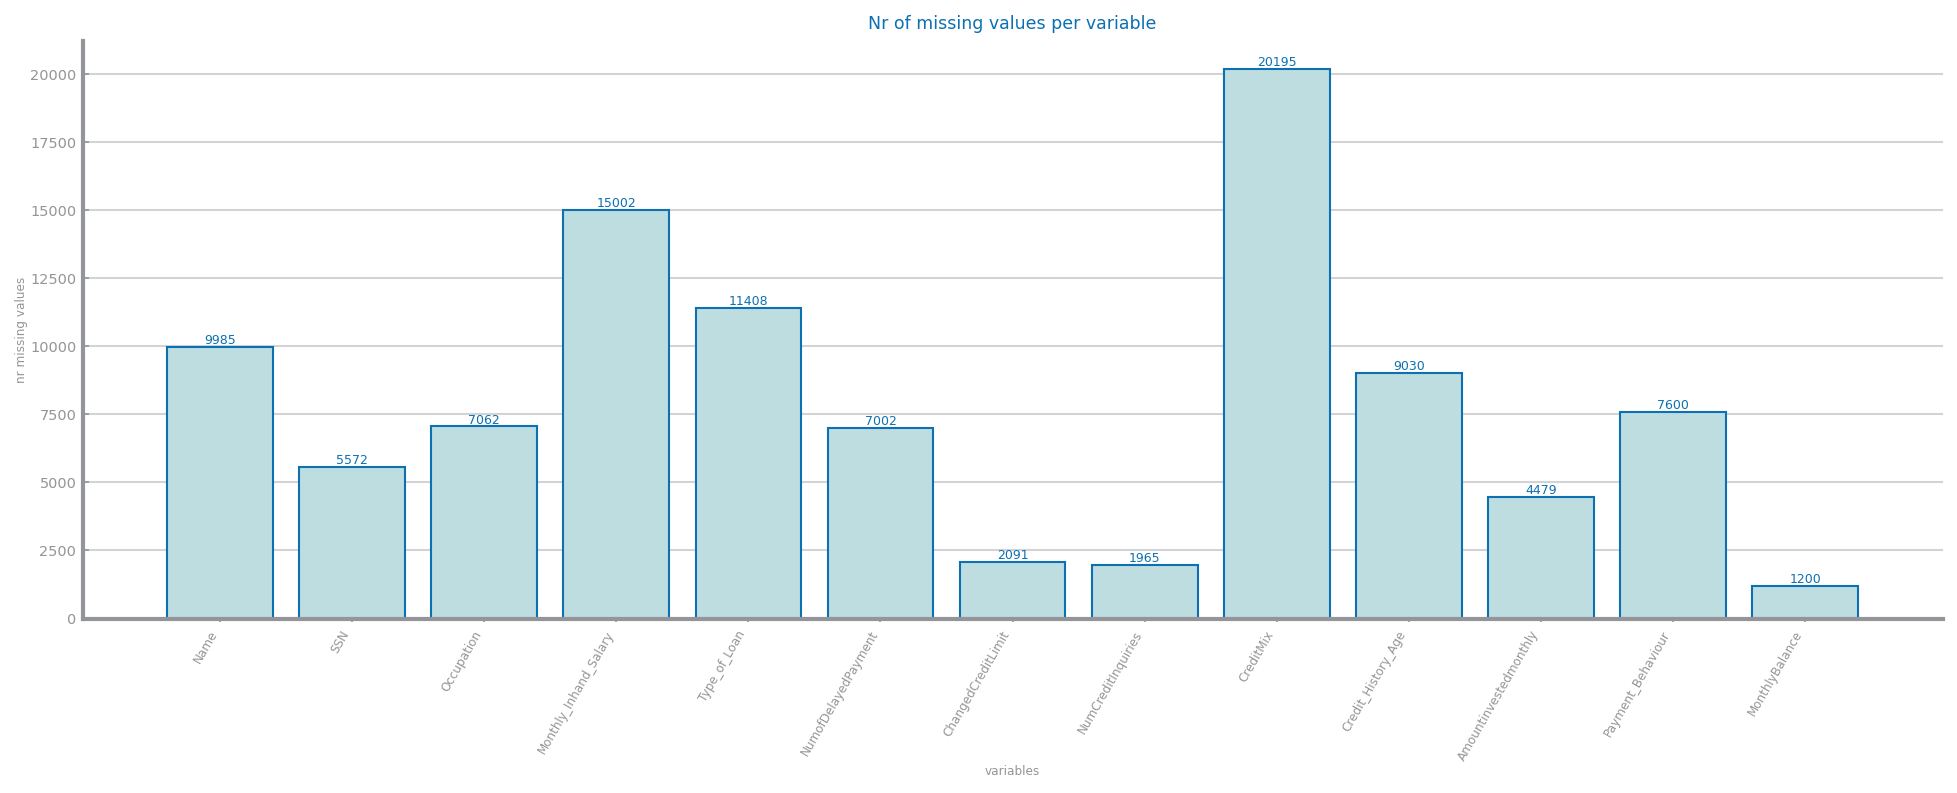

In [22]:
#Figure 3 Nr missing values 
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plt.figure(figsize=(16, 5))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
plt.xticks(rotation=60, ha='right')
plt.show()

### Distribution

{'numeric': ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'NumofLoan', 'Delay_from_due_date', 'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio', 'TotalEMIpermonth', 'Amountinvestedmonthly', 'MonthlyBalance'], 'binary': ['Credit_Score'], 'date': [], 'symbolic': ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Type_of_Loan', 'CreditMix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']}


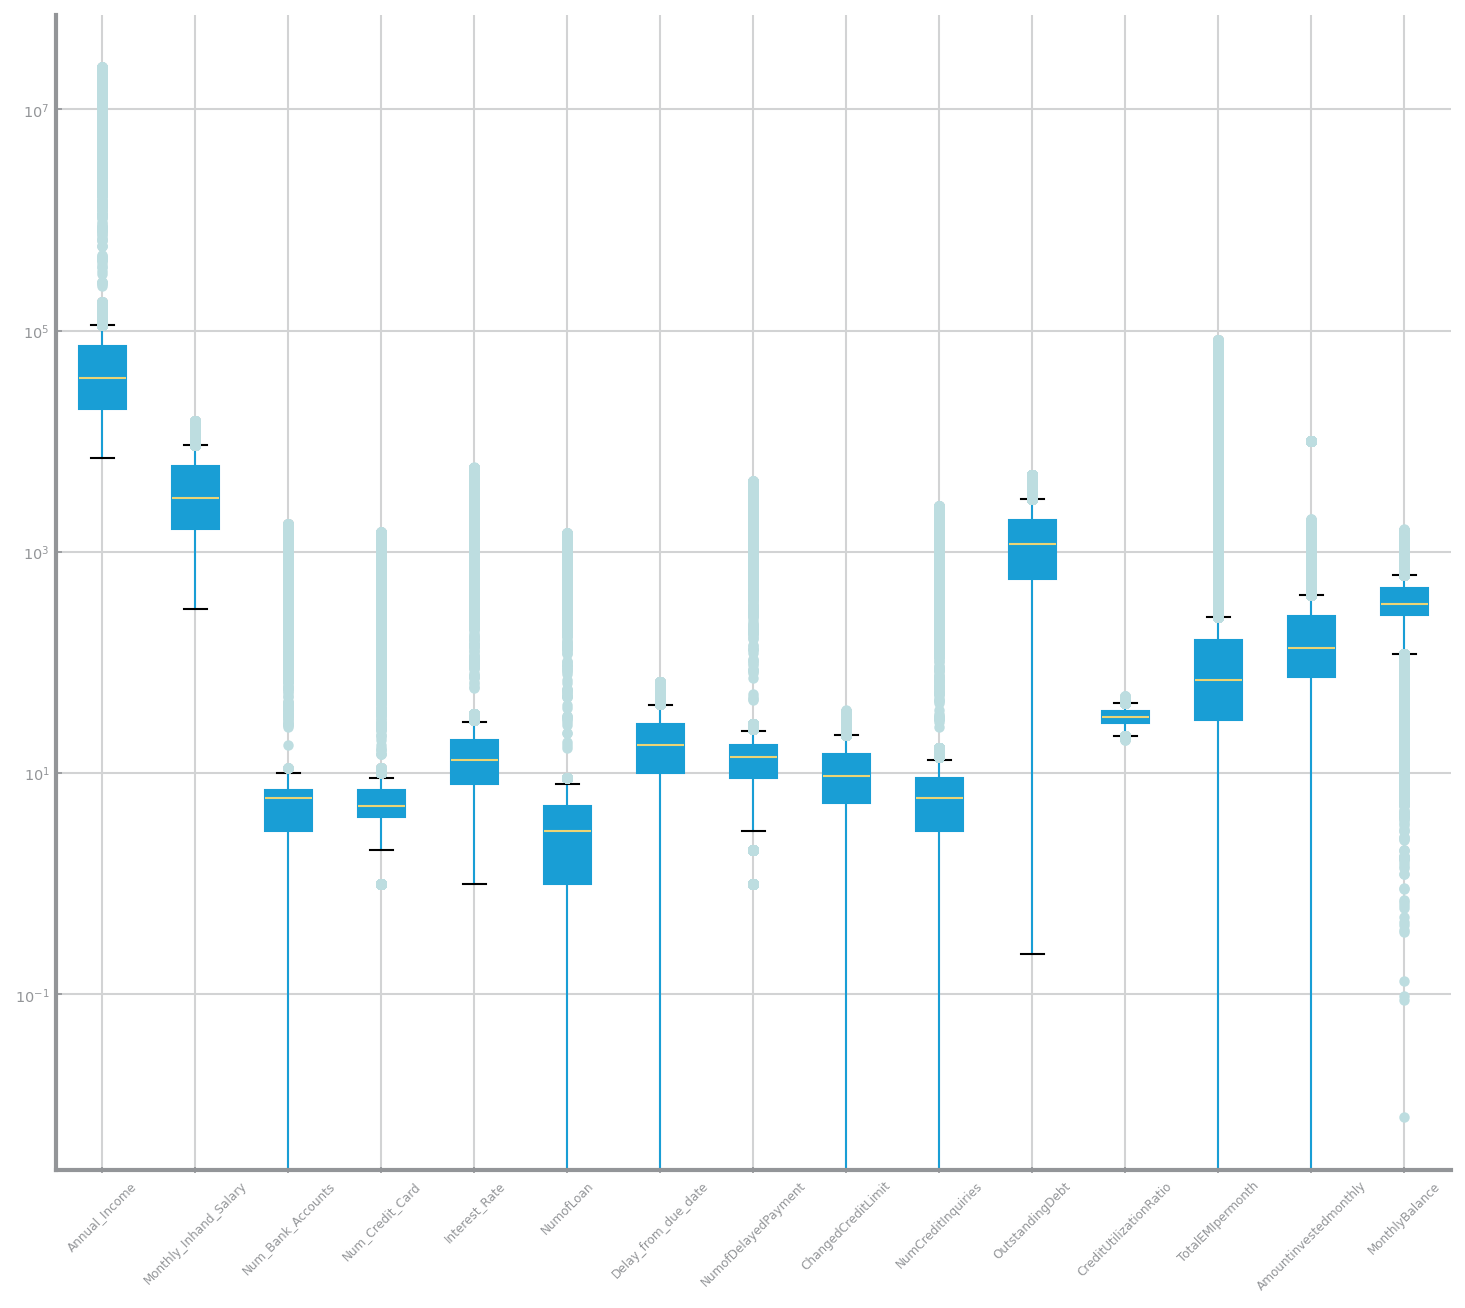

In [23]:
# Figure 4 Global boxplots 
variables_types: dict[str, list] = get_variable_types(df)
print(variables_types)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    plt.figure(figsize=(12, 10))
    df[numeric].boxplot(rot=45)
    plt.yscale('log') 
else:
    print("There are no numeric variables.")

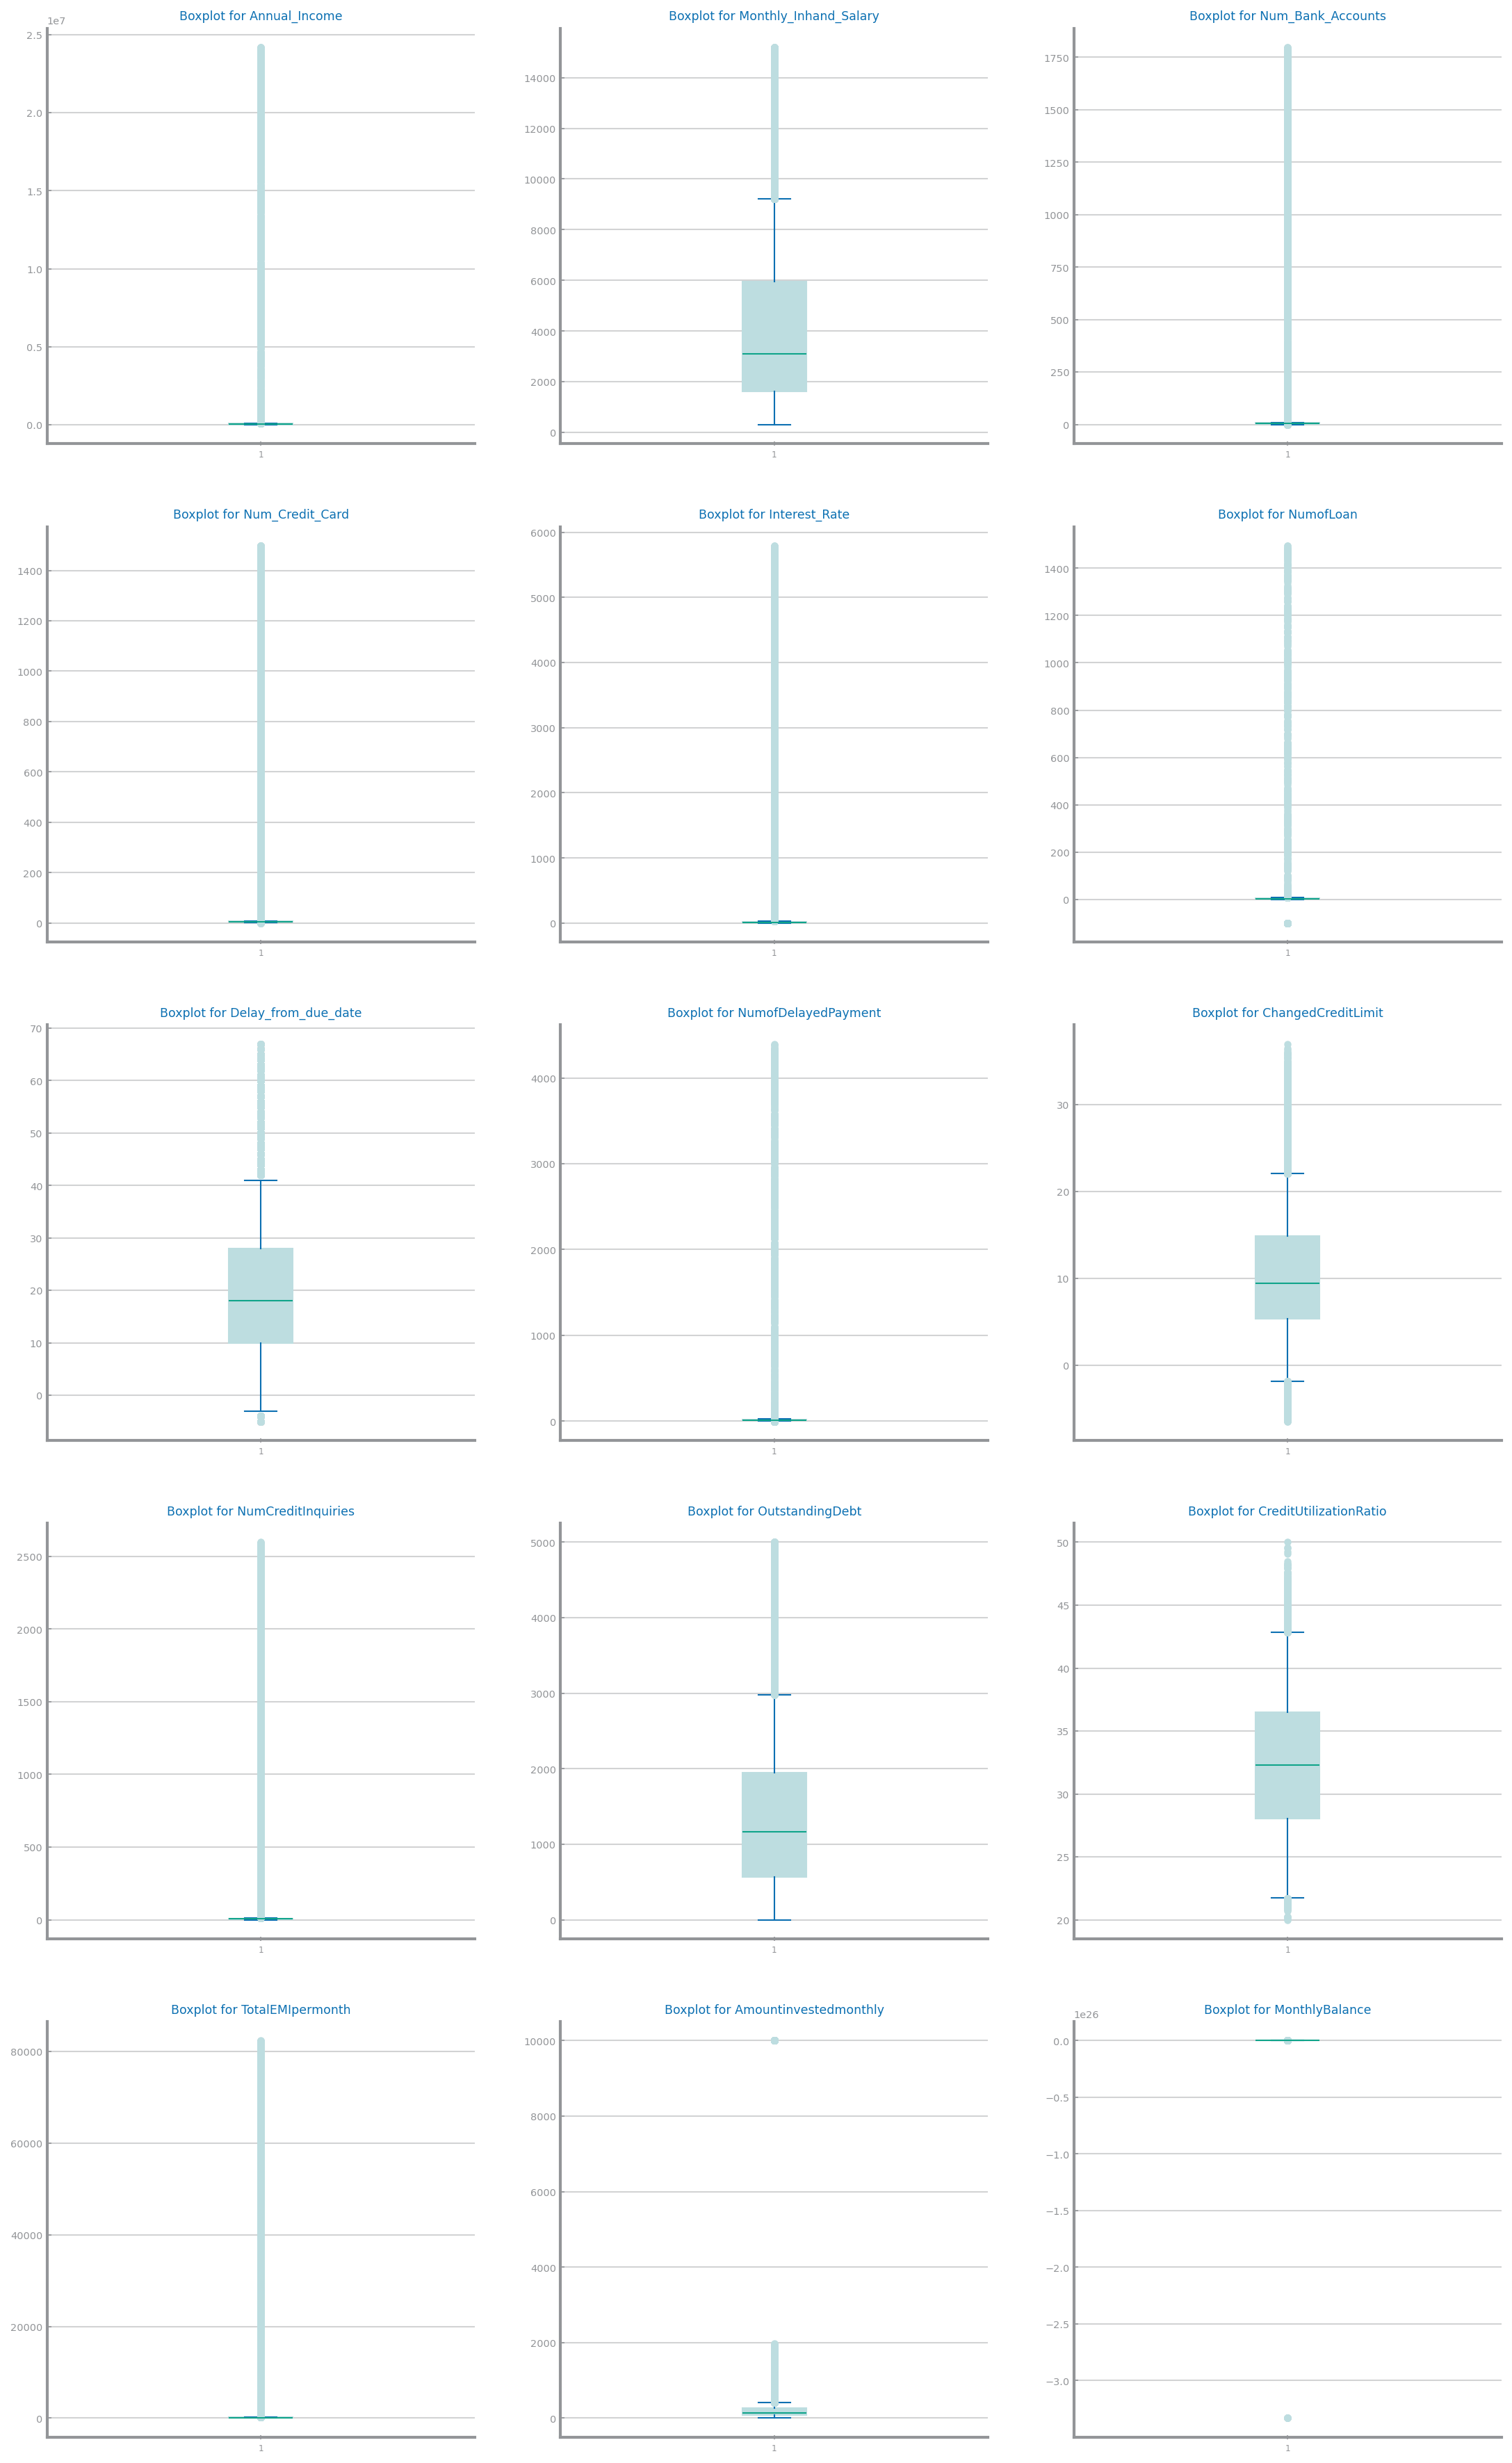

In [24]:
# Figure 6 Single variable boxplots 
if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))

    fig, axs = plt.subplots(
        rows, cols, figsize=(cols * HEIGHT*1.5, rows * HEIGHT*1.5), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
else:
    print("There are no numeric variables.")

In [25]:
# Figure 8 Histograms


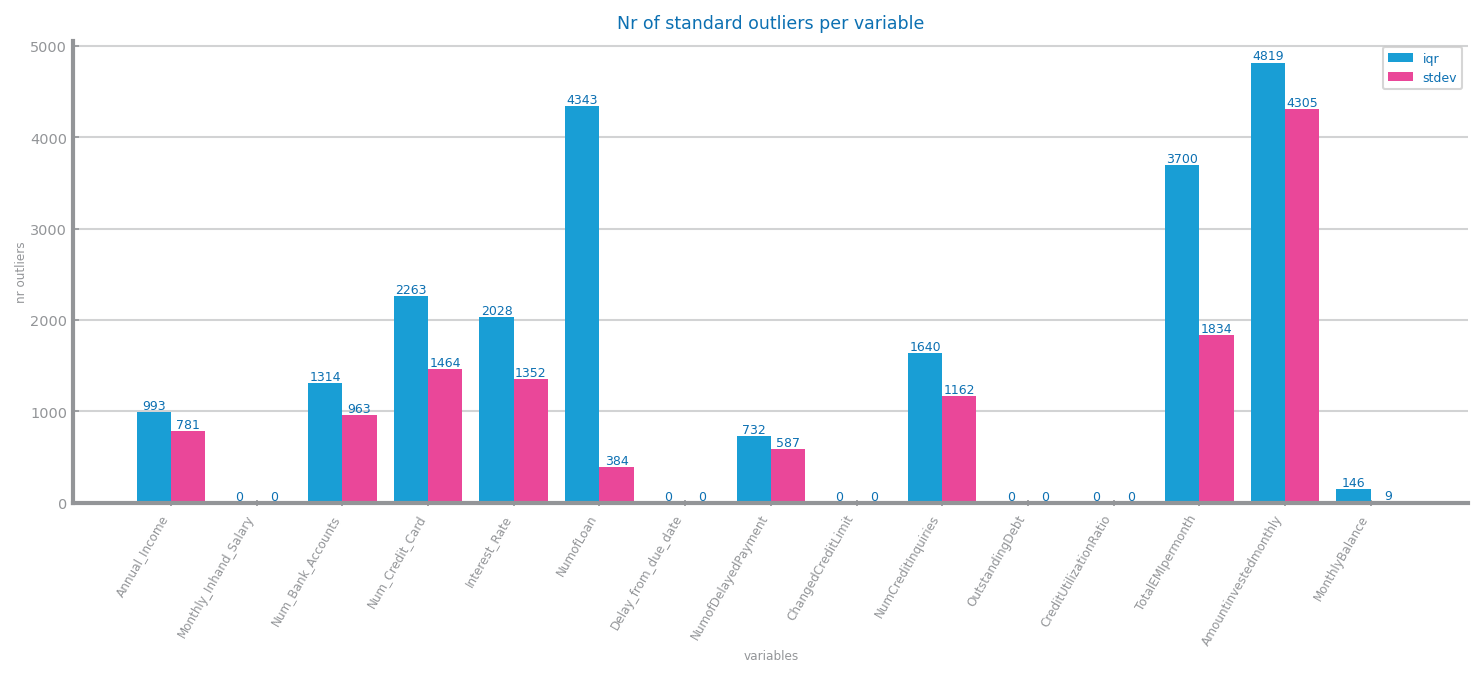

In [26]:
# Figure 10 Outliers study 
if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric, nrstdev=4, iqrfactor=4.5)
    plt.figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    plt.xticks(rotation=60, ha='right')
    plt.show()
else:
    print("There are no numeric variables.")

Credit_Score
Good    71002
Poor    28998
Name: count, dtype: int64


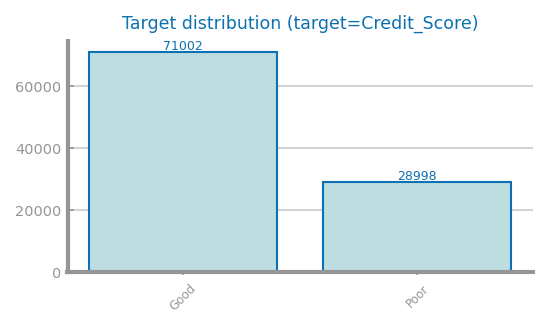

In [27]:
# Figure 12 Class distribution 
from pandas import Series
target = "Credit_Score"

values: Series = df[target].value_counts()
print(values)

plt.figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
plt.show()

### Sparsity

In [30]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show

columns_to_remove = ['ID','Type_of_Loan', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN']
data = df.drop(columns_to_remove, axis=1).dropna()

vars: list = data.columns.to_list()
if [] != vars:
    target = "Credit_Score"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])

else:
    print("Sparsity class: there are no variables.")
    
fig_path = "../figures/data_profiling/"
plt.savefig(fig_path+"sparsity_service")

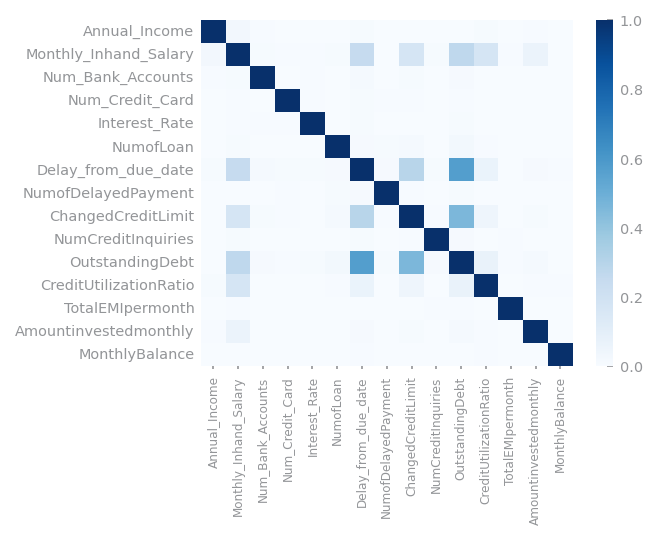

In [29]:
from seaborn import heatmap
from pandas import read_csv, DataFrame

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df[numeric].corr().abs()

plt.figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
plt.show()